# Libraries

In [1]:
# install.packages('')

In [1]:
library(caTools)
library(ggplot2)
library(repr)
options(repr.plot.width=8,repr.plot.height=4)

# Read data

In [2]:
root_dir="~/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/"
work_dir="Course data/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling"
setwd(paste(root_dir,work_dir,sep=''))
df=read.csv('Ads_CTR_Optimisation.csv')
str(df)

'data.frame':	10000 obs. of  10 variables:
 $ Ad.1 : int  1 0 0 0 0 1 0 1 0 0 ...
 $ Ad.2 : int  0 0 0 1 0 1 0 1 0 0 ...
 $ Ad.3 : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Ad.4 : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Ad.5 : int  1 0 0 0 0 0 0 1 0 0 ...
 $ Ad.6 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Ad.7 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Ad.8 : int  0 0 0 1 0 0 0 0 0 0 ...
 $ Ad.9 : int  1 1 0 0 0 0 0 0 0 0 ...
 $ Ad.10: int  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
colMeans(df)

Ad.1   Ad.2   Ad.3   Ad.4   Ad.5   Ad.6   Ad.7   Ad.8   Ad.9  Ad.10 
0.1703 0.1295 0.0728 0.1196 0.2695 0.0126 0.1112 0.2091 0.0952 0.0489

# Thomson Sampling

In [31]:
show=function(pos){
    if(randomizeStream){
        record_pos=sample(1:numShows,1)
    } else {
        record_pos=sum(o+z)+1
    }
    if(df[record_pos,pos]==1){
        o[pos]<<-o[pos]+1
    } else {
        z[pos]<<-z[pos]+1
    }
}

compute=function(){
    a<<-sapply(1:numBandits,FUN=function(pos){o[pos]/(o[pos]+z[pos])})
    probs<<-sapply(1:numBandits,FUN=function(pos){rbeta(1,o[pos]+1,z[pos]+1)})
    p<<-sapply(probs,FUN=function(prob){prob/sum(probs)})
}

report=function(){
    writeLines(noquote(paste('=== State at round',sum(o+z),'===')))
    writeLines(noquote(paste('Total score:',sum(o))))
    writeLines('Bandit  Num  Scr  Avg  Prb')
    for(pos in 1:numBandits){
        writeLines(noquote(paste(format(pos,   width=4),' ',
                                 format(o[pos]+z[pos],width=4),
                                 format(o[pos],width=4),
                                 sprintf('%4.2f',a[pos]),
                                 sprintf('%4.2f',p[pos]))))
    }
}

seed=function(){
    seedPosLst=1:numBandits
    if(randomizeSeed){
        seedPosLst=sample(seedPosLst)
    }
    writeLines(noquote(paste(c('Seeding [',seedPosLst,']...'),collapse=' ')))
    for(pos in seedPosLst){
        show(pos)
    }
    compute()
    report()
}

streamItToMe=function(numRounds=100){
    for(r in 1:numRounds){
        if(useProbs){
            pos=sample(1:numBandits,1,prob=p)
        } else {
            pos=which.max(p)
        }
        show(pos)
        compute()
    }
    report()
}

In [32]:
seedRounds=1
randomizeSeed=FALSE
randomizeStream=FALSE
useProbs=FALSE

In [33]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
o=integer(numBandits)
z=integer(numBandits)
a=numeric(numBandits)
p=numeric(numBandits)

In [34]:
seed()

Seeding [ 1 2 3 4 5 6 7 8 9 10 ]...
=== State at round 10 ===
Total score: 1
Bandit  Num  Scr  Avg  Prb
   1      1    1 1.00 0.33
   2      1    0 0.00 0.03
   3      1    0 0.00 0.05
   4      1    0 0.00 0.24
   5      1    0 0.00 0.24
   6      1    0 0.00 0.01
   7      1    0 0.00 0.03
   8      1    0 0.00 0.01
   9      1    0 0.00 0.00
  10      1    0 0.00 0.06


In [35]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2576
Bandit  Num  Scr  Avg  Prb
   1    268   53 0.20 0.19
   2     52    4 0.08 0.05
   3     40    2 0.05 0.08
   4     39    2 0.05 0.03
   5   8920 2389 0.27 0.23
   6     26    0 0.00 0.05
   7     30    1 0.03 0.03
   8    506  112 0.22 0.21
   9     78   10 0.13 0.08
  10     41    3 0.07 0.03


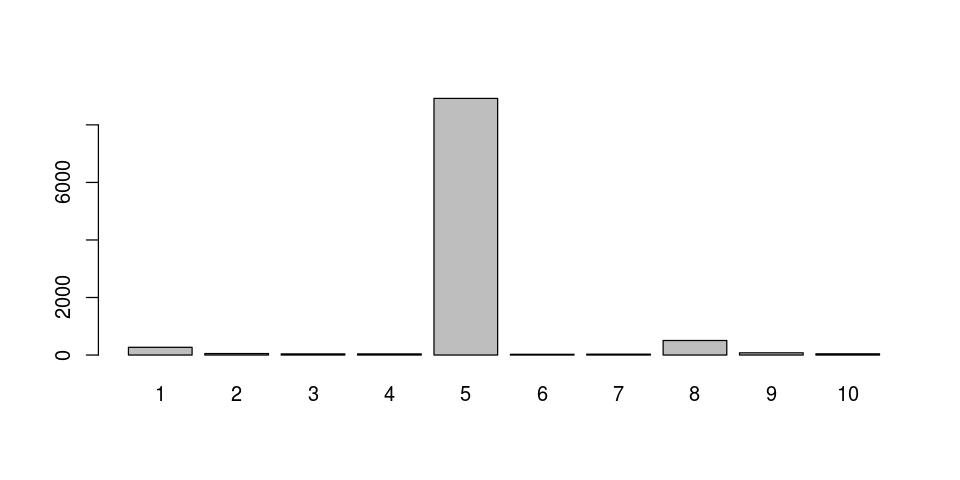

In [37]:
barplot(o+z,names.arg=1:numBandits)

In [39]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=FALSE
useProbs=FALSE

In [40]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
o=integer(numBandits)
z=integer(numBandits)
a=numeric(numBandits)
p=numeric(numBandits)

In [41]:
seed()

Seeding [ 6 3 10 1 9 5 2 7 8 4 ]...
=== State at round 10 ===
Total score: 0
Bandit  Num  Scr  Avg  Prb
   1      1    0 0.00 0.09
   2      1    0 0.00 0.08
   3      1    0 0.00 0.04
   4      1    0 0.00 0.08
   5      1    0 0.00 0.23
   6      1    0 0.00 0.15
   7      1    0 0.00 0.17
   8      1    0 0.00 0.02
   9      1    0 0.00 0.11
  10      1    0 0.00 0.03


In [42]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2584
Bandit  Num  Scr  Avg  Prb
   1    105   14 0.13 0.14
   2     71    9 0.13 0.10
   3     81    9 0.11 0.08
   4     39    2 0.05 0.05
   5   9234 2482 0.27 0.21
   6     27    0 0.00 0.02
   7     46    3 0.07 0.07
   8    283   53 0.19 0.14
   9     76   10 0.13 0.13
  10     38    2 0.05 0.06


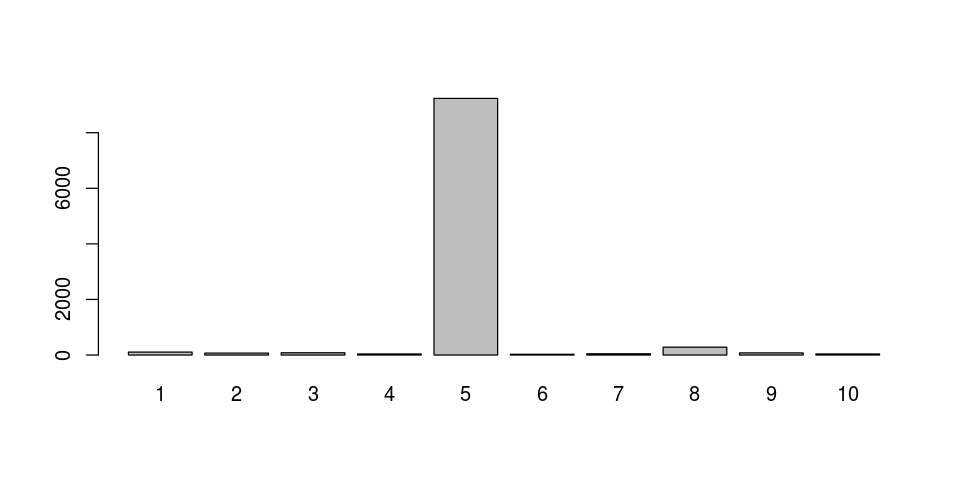

In [43]:
barplot(o+z,names.arg=1:numBandits)

In [44]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=TRUE
useProbs=FALSE

In [45]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
o=integer(numBandits)
z=integer(numBandits)
a=numeric(numBandits)
p=numeric(numBandits)

In [46]:
seed()

Seeding [ 9 3 7 1 5 10 4 8 2 6 ]...
=== State at round 10 ===
Total score: 2
Bandit  Num  Scr  Avg  Prb
   1      1    0 0.00 0.04
   2      1    1 1.00 0.21
   3      1    0 0.00 0.14
   4      1    0 0.00 0.17
   5      1    1 1.00 0.16
   6      1    0 0.00 0.03
   7      1    0 0.00 0.05
   8      1    0 0.00 0.11
   9      1    0 0.00 0.01
  10      1    0 0.00 0.08


In [47]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 2585
Bandit  Num  Scr  Avg  Prb
   1     40    2 0.05 0.05
   2     49    4 0.08 0.04
   3     34    1 0.03 0.05
   4     71    8 0.11 0.19
   5   9610 2557 0.27 0.33
   6     25    0 0.00 0.07
   7     26    0 0.00 0.02
   8     62    8 0.13 0.14
   9     42    3 0.07 0.06
  10     41    2 0.05 0.05


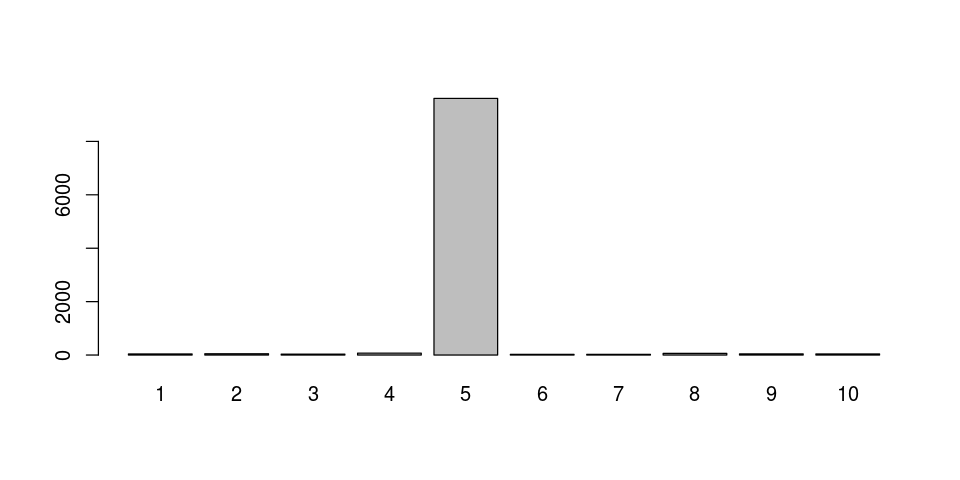

In [48]:
barplot(o+z,names.arg=1:numBandits)

In [49]:
seedRounds=1
randomizeSeed=TRUE
randomizeStream=TRUE
useProbs=TRUE

In [50]:
numShows  =dim(df)[1]
numBandits=dim(df)[2]
o=integer(numBandits)
z=integer(numBandits)
a=numeric(numBandits)
p=numeric(numBandits)

In [51]:
seed()

Seeding [ 3 10 4 8 1 9 6 2 7 5 ]...
=== State at round 10 ===
Total score: 1
Bandit  Num  Scr  Avg  Prb
   1      1    0 0.00 0.14
   2      1    1 1.00 0.12
   3      1    0 0.00 0.13
   4      1    0 0.00 0.15
   5      1    0 0.00 0.04
   6      1    0 0.00 0.03
   7      1    0 0.00 0.10
   8      1    0 0.00 0.14
   9      1    0 0.00 0.10
  10      1    0 0.00 0.05


In [52]:
streamItToMe(9990)

=== State at round 10000 ===
Total score: 1766
Bandit  Num  Scr  Avg  Prb
   1   1254  216 0.17 0.12
   2   1195  169 0.14 0.12
   3    381   31 0.08 0.07
   4   1125  163 0.14 0.10
   5   2257  649 0.29 0.21
   6    280    5 0.02 0.01
   7    855  101 0.12 0.09
   8   1640  353 0.22 0.14
   9    599   55 0.09 0.09
  10    414   24 0.06 0.04


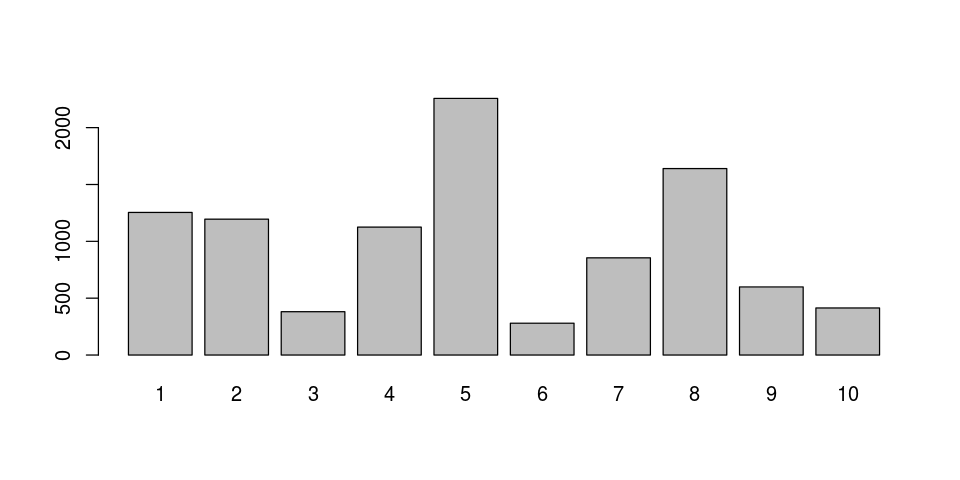

In [53]:
barplot(o+z,names.arg=1:numBandits)